## Loss and metric

- **Target Metric** = What we want to optimize. How we want the model to be evaluated.
- **Optimization Loss or Target Loss or Optimization Metric**= What the model optimizes.

For example, logloss is widely used for optimizing a model but the accuracy is how the solution is eventually evaluated.

This is more like Expectation vs Reality.




## Approaches to target metric optimization

### a. Run the right model because the metric can be optimized directly

- MSE, Logloss

Just find a model that optimizes the metric by **setting the loss function to that metric**.

### b. Preprocess train and optimize another metric

- MSPE, MAPE, RMSLE

For example, to optimize MSPE, we can preprocess or resample the train set and optimize MSE loss.

### c. Optimize another metric and postprocess predictions

- Accuracy, Kappa

### d. Write custom loss function

A loss function that will serve as a proxy for the desired metric. For example, quadratic weighted kappa.

### e. Optimize another metric, use Early Stopping

Optimize metric M1, monitor metric M2
- Stop when M2 score is the best


## Optimizing a regression metrics

- RMSE, MSE, R-squared: These are optimized by most libraries.  
(Synonyms: L2 loss)


- MAE: This isn't optimized by XGBoost, SGDRegressor. Huber loss is similar to MAE. MAE can be made smooth as "Huber loss".
(Synonyms: L1, Median regression, Quantile loss)


- MSPE and MAPE:

    - Use weights for samples. And then use "MSE or MAE".
        - Not all libraries accept sample weights (XGboost and lightGBM accept sample weights)
    - One can also sample the train set (df.sample(weights=sample_weights)) and use any model that optimizes MSE or MAE.
    

- RMSLE:
    - To be able to use it, we can transform MSE
    
    rmsle.png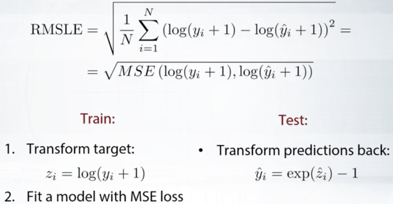

## Optimizing a classification metrics

- Logloss: It isn't optimized by RandomForestClassifier. If the classifier doesn't optimize logloss, it's predictions have to be calibrated. How to calibrate predictions?
    - With Platt Scaling: Fit log regression to your predictions. (TODO)
    - With isotonic regression: Fit isotonic regression to your predictions. (TODO)
    - With Stacking: Fit any classifier, and then fit another model on top that uses logloss. (TODO)
  
  
- Accuracy: If it's binary, fit any metric and tune the threshold. It is hard to optimize.


- AUC: Run the right model or just optimize logloss. The loss is pointwise. We can use pairwise loss. XGBoost, LightGBM, NN libraries implement that pairwise loss.


- (Quadratic weighted) Kappa: Optimize MSE and find right thresholds or do custom smooth loss for GBDT or NNs (TODO). 